In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread('C://Users//adist//OneDrive//Pictures//mypic.jpg')
img.shape

(879, 1119, 3)

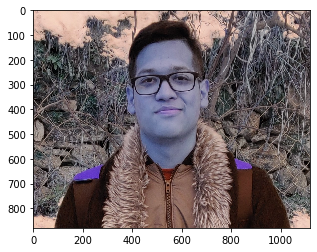

In [7]:
plt.imshow(img)

In [9]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(879, 1119)

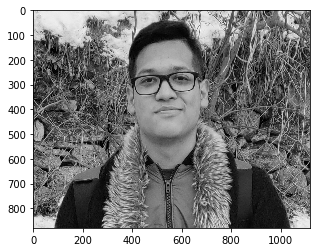

In [11]:
plt.imshow(gray,cmap='gray')

In [13]:
face_cascade = cv2.CascadeClassifier('C://Users//adist//Downloads//sports//model//haar//haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C://Users//adist//Downloads//sports//model//haar//haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[364, 149, 342, 342]], dtype=int32)

In [27]:
(x,y,w,h) = faces[0]
start = (x,y)
end = (x+w,y+h)

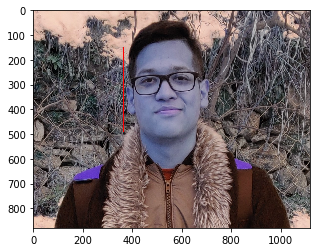

In [31]:
face_img = cv2.rectangle(img,start,end,(255,0,0),2)
plt.imshow(face_img)

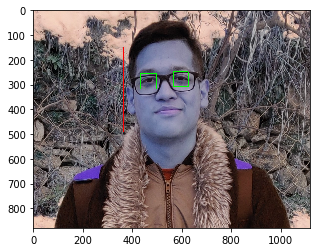

In [32]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

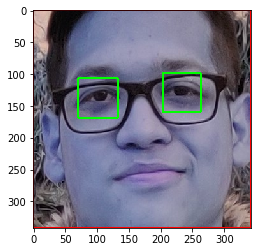

In [33]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [37]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

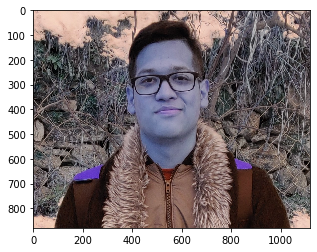

In [42]:
original_image1 = cv2.imread('C://Users//adist//OneDrive//Pictures//mypic.jpg')
plt.imshow(original_image1)

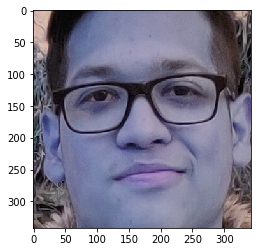

In [41]:
cropped_image1 = get_cropped_image('C://Users//adist//OneDrive//Pictures//mypic.jpg')
plt.imshow(cropped_image1)

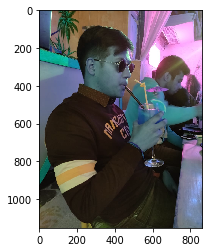

In [44]:
original_image2 = cv2.imread('C://Users//adist//OneDrive//Pictures//dp.jpeg')
plt.imshow(original_image2)

In [ ]:
#gives error
cropped_image2 = get_cropped_image('C://Users//adist//OneDrive//Pictures//dp.jpeg')
plt.imshow(cropped_image2)

In [58]:
data_path = 'C://Users//adist//OneDrive//Pictures//Saved Pictures//Snapchat//'
cropped_path = 'C://Users//adist//OneDrive//Pictures//cropped//'

In [59]:
import os
import shutil
if os.path.exists(cropped_path):
    shutil.rmtree(cropped_path)
os.mkdir(cropped_path)

In [60]:
for file in os.scandir(data_path):
    roi_color = get_cropped_image(file.path)
    if roi_color is not None:
        cropped_file_name = str(file.name) + '.png'
        cropped_file_path = cropped_path + cropped_file_name
        cv2.imwrite(cropped_file_path,roi_color)        